In [2]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

import os
import string
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import plotly.graph_objs as go

import time
import random

SEED = 1997

In [3]:
data_path = '../input/'
train_data = pd.read_csv(data_path + 'train_dataset.csv')
test_data = pd.read_csv(data_path + 'test_dataset.csv')
sample_sub = pd.read_csv(data_path + 'submit_example.csv')

In [4]:
print(train_data.shape, test_data.shape)

(50000, 30) (50000, 29)


In [5]:
train_data.head(5)

,用户编码,用户实名制是否通过核实,用户年龄,是否大学生客户,是否黑名单客户,是否4G不健康客户,用户网龄（月）,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,用户近6个月平均消费值（元）,用户账单当月总费用（元）,用户当月账户余额（元）,缴费用户当前是否欠费缴费,用户话费敏感度,当月通话交往圈人数,是否经常逛商场的人,近三个月月均商场出现次数,当月是否逛过福州仓山万达,当月是否到过福州山姆会员店,当月是否看电影,当月是否景点游览,当月是否体育场馆消费,当月网购类应用使用次数,当月物流快递类应用使用次数,当月金融理财类应用使用总次数,当月视频播放类应用使用次数,当月飞机类应用使用次数,当月火车类应用使用次数,当月旅游资讯类应用使用次数,信用分
0,a4651f98c82948b186bdcdc8108381b4,1,44,0,0,0,186,1,99.80,163.86,159.20,180,0,3,83,1,75,0,0,0,1,1,713,0,2740,7145,0,0,30,664
1,aeb10247db4e4d67b2550bbc42ff9827,1,18,0,0,1,5,1,29.94,153.28,145.10,110,0,3,21,1,16,0,0,0,0,0,414,0,2731,44862,0,0,0,530
2,5af23a1e0e77410abb25e9a7eee510aa,1,47,0,0,0,145,1,49.90,109.64,120.20,70,0,1,59,0,1,0,0,0,0,0,3391,0,0,4804,0,0,1,643
3,43c64379d3c24a15b8478851b22049e4,1,55,0,0,0,234,1,99.80,92.97,167.42,90,0,3,78,1,26,0,0,0,1,1,500,0,1931,3141,0,0,5,649
4,f1687f3b8a6f4910bd0b13eb634056e2,1,40,0,0,0,76,1,49.90,95.47,101.00,80,0,3,70,1,44,0,0,0,1,0,522,0,64,59,0,0,0,648


In [6]:
test_data.head(5)

,用户编码,用户实名制是否通过核实,用户年龄,是否大学生客户,是否黑名单客户,是否4G不健康客户,用户网龄（月）,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,用户近6个月平均消费值（元）,用户账单当月总费用（元）,用户当月账户余额（元）,缴费用户当前是否欠费缴费,用户话费敏感度,当月通话交往圈人数,是否经常逛商场的人,近三个月月均商场出现次数,当月是否逛过福州仓山万达,当月是否到过福州山姆会员店,当月是否看电影,当月是否景点游览,当月是否体育场馆消费,当月网购类应用使用次数,当月物流快递类应用使用次数,当月金融理财类应用使用总次数,当月视频播放类应用使用次数,当月飞机类应用使用次数,当月火车类应用使用次数,当月旅游资讯类应用使用次数
0,7171737d49b143d1b38883a39e4a5730,1,30,0,0,0,22,1,99.8,69.53,50.38,190,0,4,19,0,2,0,0,0,1,0,281,0,74,807,0,0,2
1,3af0a449d5424488912e8fb2bf4b9faa,1,70,0,0,0,84,0,0.0,12.89,34.06,20,0,5,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,eb2cf02e0d5c4d1294dd73e776dbb441,1,35,0,0,0,237,0,0.0,161.71,171.09,120,0,2,206,0,84,1,0,1,1,1,186,0,943,261,0,0,0
3,9c0f780ecb254670a11aa9e3f10777c5,1,44,0,0,0,161,0,0.0,229.60,223.00,220,1,5,171,0,85,0,0,1,1,1,244,0,72,591,0,0,3
4,d794eed46c1e44f785a575f18b3023a5,1,44,0,0,0,153,1,99.8,105.42,103.60,50,0,4,77,0,81,0,0,0,1,1,132,0,0,88,0,0,0


In [7]:
corr_matrix = train_data.corr()

In [10]:
corr = corr_matrix.abs().unstack().sort_values(ascending=False, kind="quicksort").reset_index()
#unstack n*n -> n^2*1
corr = corr[corr['level_0'] < corr['level_1']]

In [11]:
corr.head(30)

,level_0,level_1,0
30,用户账单当月总费用（元）,用户近6个月平均消费值（元）,0.903464
31,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,0.550815
33,信用分,用户网龄（月）,0.546893
36,信用分,用户近6个月平均消费值（元）,0.493749
37,信用分,当月通话交往圈人数,0.477302
40,当月通话交往圈人数,用户近6个月平均消费值（元）,0.470274
41,用户近6个月平均消费值（元）,缴费用户最近一次缴费金额（元）,0.459308
44,当月通话交往圈人数,用户账单当月总费用（元）,0.455292
45,用户账单当月总费用（元）,缴费用户最近一次缴费金额（元）,0.448055
48,信用分,用户账单当月总费用（元）,0.443064


In [12]:
corr.tail(30)

,level_0,level_1,0
781,当月金融理财类应用使用总次数,缴费用户当前是否欠费缴费,0.002538
783,当月是否看电影,当月物流快递类应用使用次数,0.002482
786,当月物流快递类应用使用次数,用户实名制是否通过核实,0.002458
787,当月旅游资讯类应用使用次数,缴费用户当前是否欠费缴费,0.002367
789,当月飞机类应用使用次数,用户实名制是否通过核实,0.002360
792,是否大学生客户,用户账单当月总费用（元）,0.002094
794,是否大学生客户,用户年龄,0.002046
796,当月是否逛过福州仓山万达,是否4G不健康客户,0.001971
798,当月是否到过福州山姆会员店,是否大学生客户,0.001933
799,当月物流快递类应用使用次数,用户最近一次缴费距今时长（月）,0.001884


In [19]:
corr_target = corr[corr['level_0']=='信用分']

In [22]:
corr_target.head(28)

,level_0,level_1,0
33,信用分,用户网龄（月）,0.546893
36,信用分,用户近6个月平均消费值（元）,0.493749
37,信用分,当月通话交往圈人数,0.477302
48,信用分,用户账单当月总费用（元）,0.443064
52,信用分,缴费用户最近一次缴费金额（元）,0.333539
63,信用分,当月是否景点游览,0.270870
80,信用分,用户话费敏感度,0.239400
86,信用分,当月是否体育场馆消费,0.233067
98,信用分,用户最近一次缴费距今时长（月）,0.215252
106,信用分,近三个月月均商场出现次数,0.197827


In [25]:
corr_matrix_test = test_data.corr()
corr_test = corr_matrix_test.abs().unstack().sort_values(ascending=False, kind="quicksort").reset_index()
#unstack n*n -> n^2*1
corr_test = corr_test[corr_test['level_0'] < corr_test['level_1']]

In [26]:
corr_test.head(30)

,level_0,level_1,0
29,用户账单当月总费用（元）,用户近6个月平均消费值（元）,0.907503
30,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,0.544417
32,当月通话交往圈人数,用户近6个月平均消费值（元）,0.461583
35,用户近6个月平均消费值（元）,缴费用户最近一次缴费金额（元）,0.454588
37,当月通话交往圈人数,用户账单当月总费用（元）,0.446623
39,用户账单当月总费用（元）,缴费用户最近一次缴费金额（元）,0.441895
40,当月是否体育场馆消费,当月是否景点游览,0.353338
43,当月是否体育场馆消费,近三个月月均商场出现次数,0.323710
45,当月视频播放类应用使用次数,是否4G不健康客户,0.316043
46,用户年龄,用户网龄（月）,0.315017


In [27]:
corr_test.tail(30)

,level_0,level_1,0
725,当月火车类应用使用次数,当月物流快递类应用使用次数,0.002562
727,当月金融理财类应用使用总次数,缴费用户当前是否欠费缴费,0.002374
729,当月是否逛过福州仓山万达,当月物流快递类应用使用次数,0.002340
731,当月旅游资讯类应用使用次数,缴费用户当前是否欠费缴费,0.002117
732,当月旅游资讯类应用使用次数,用户实名制是否通过核实,0.002108
735,当月火车类应用使用次数,缴费用户当前是否欠费缴费,0.002105
736,当月是否到过福州山姆会员店,是否4G不健康客户,0.002079
739,当月旅游资讯类应用使用次数,用户当月账户余额（元）,0.002078
740,当月物流快递类应用使用次数,用户实名制是否通过核实,0.001982
742,当月火车类应用使用次数,是否大学生客户,0.001961


In [28]:
train_data.isnull().any().any()

False

In [29]:
test_data.isnull().any().any()

False

Distributions of 29 columns


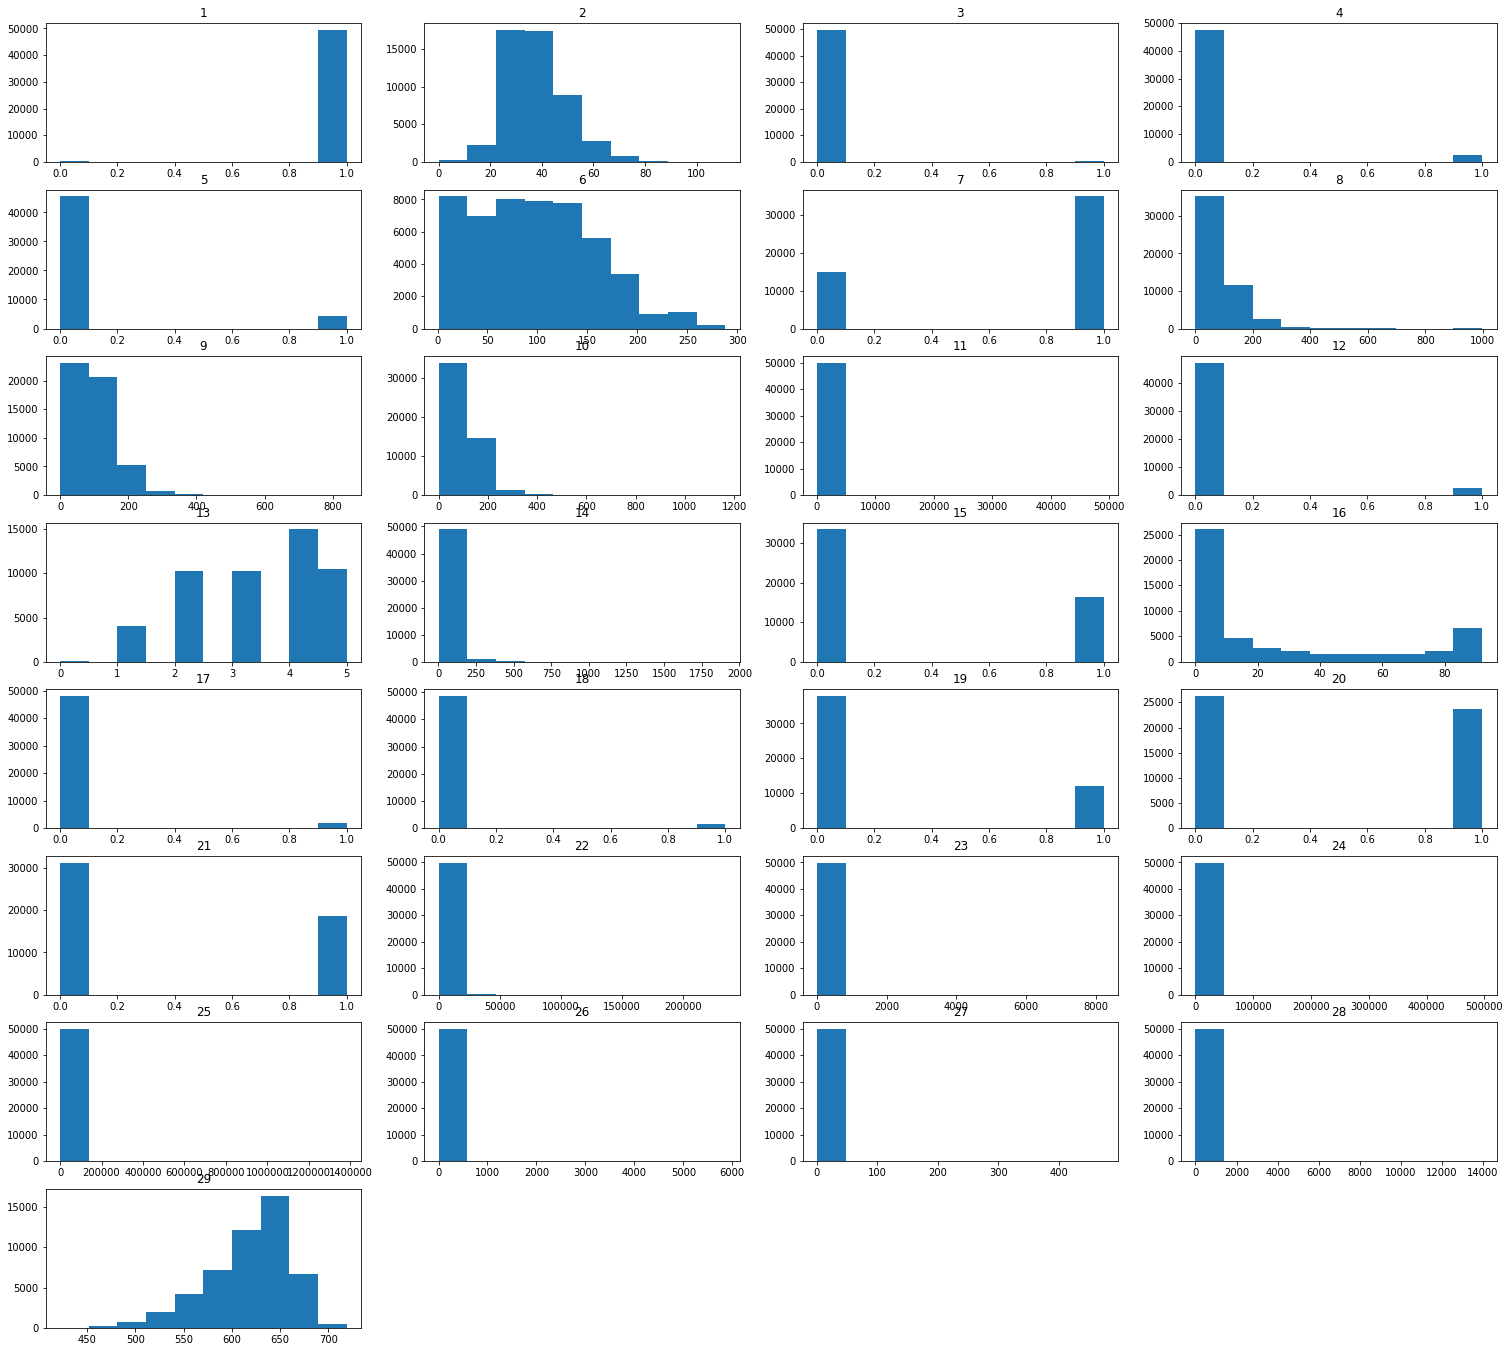

In [47]:
print('Distributions of 29 columns')
plt.figure(figsize=(26, 24))
for i, col in enumerate(list(train_data.columns)[1:30]):
    plt.subplot(8, 4, i + 1)
    plt.hist(train_data[col])
    plt.title(i+1)

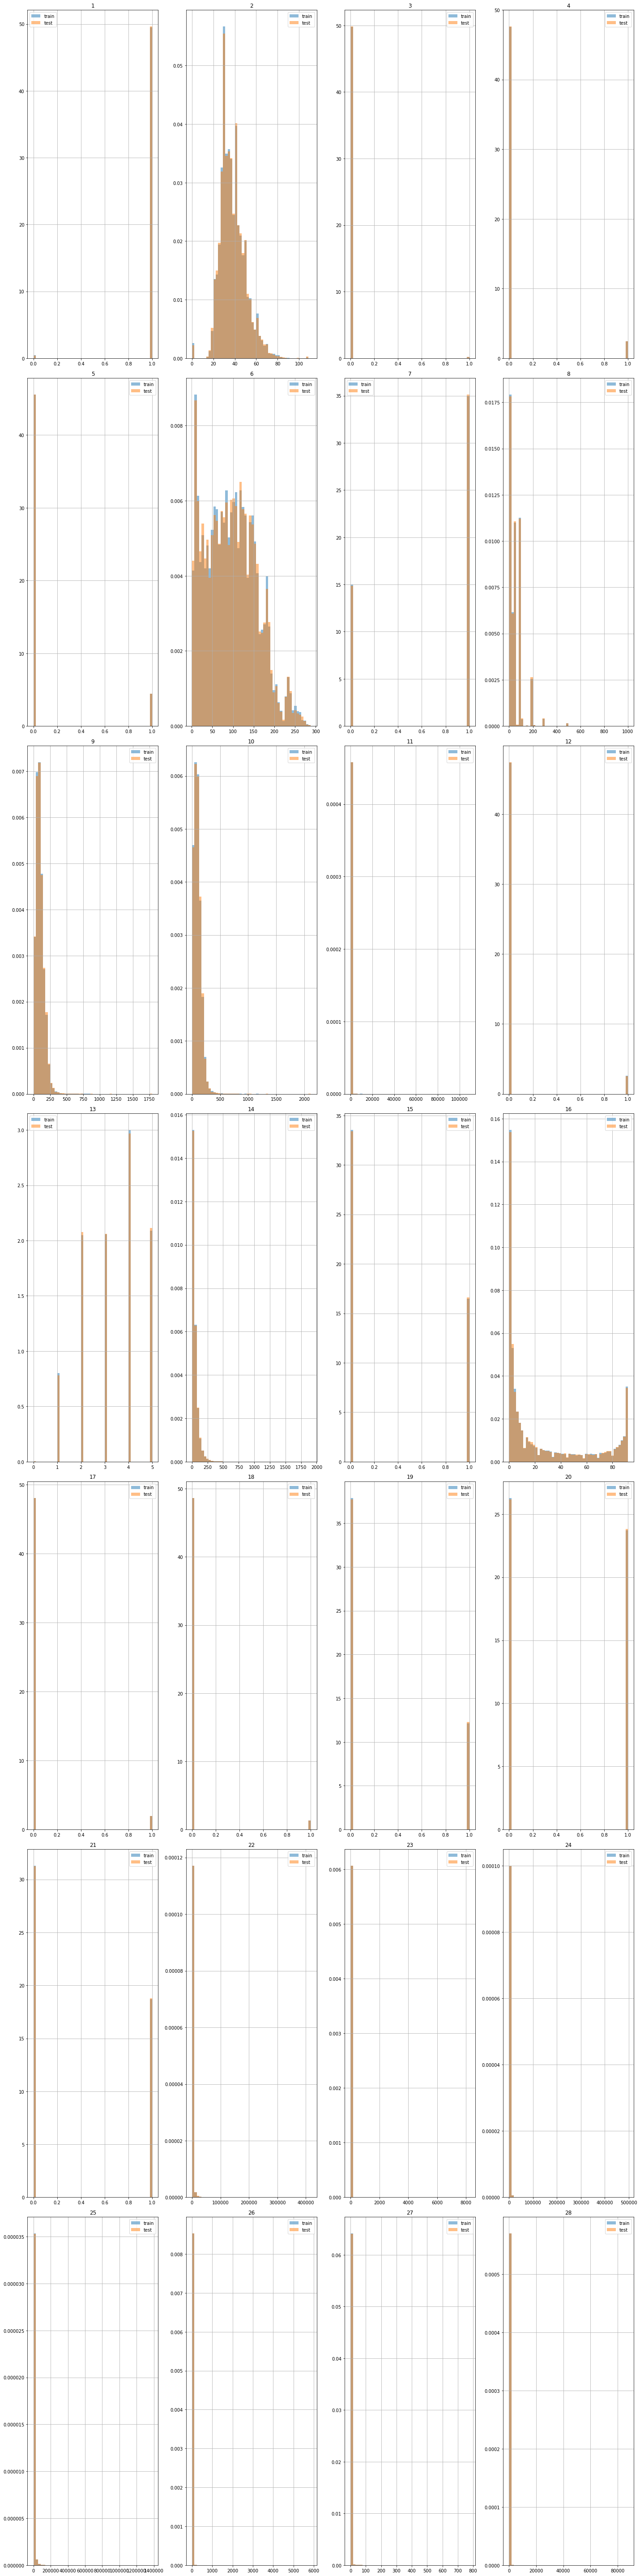

In [53]:
plt.figure(figsize=(20,80))
for i, c in enumerate(train_data.iloc[:, 1:29].columns):
    plt.subplot(7,4,i+1)
    max_, min_ = np.max([train_data[c].max(), test_data[c].max()]), np.min([train_data[c].min(), test_data[c].min()])
    bins = np.linspace(min_,max_,51)
    train_data[c].hist(alpha=0.5,bins=bins, label="train", density=True, stacked=True)
    test_data[c].hist(alpha=0.5,bins=bins, label="test", density=True, stacked=True)
    plt.legend(loc="best")
    plt.title(f"{i+1}")
plt.tight_layout()
plt.show()

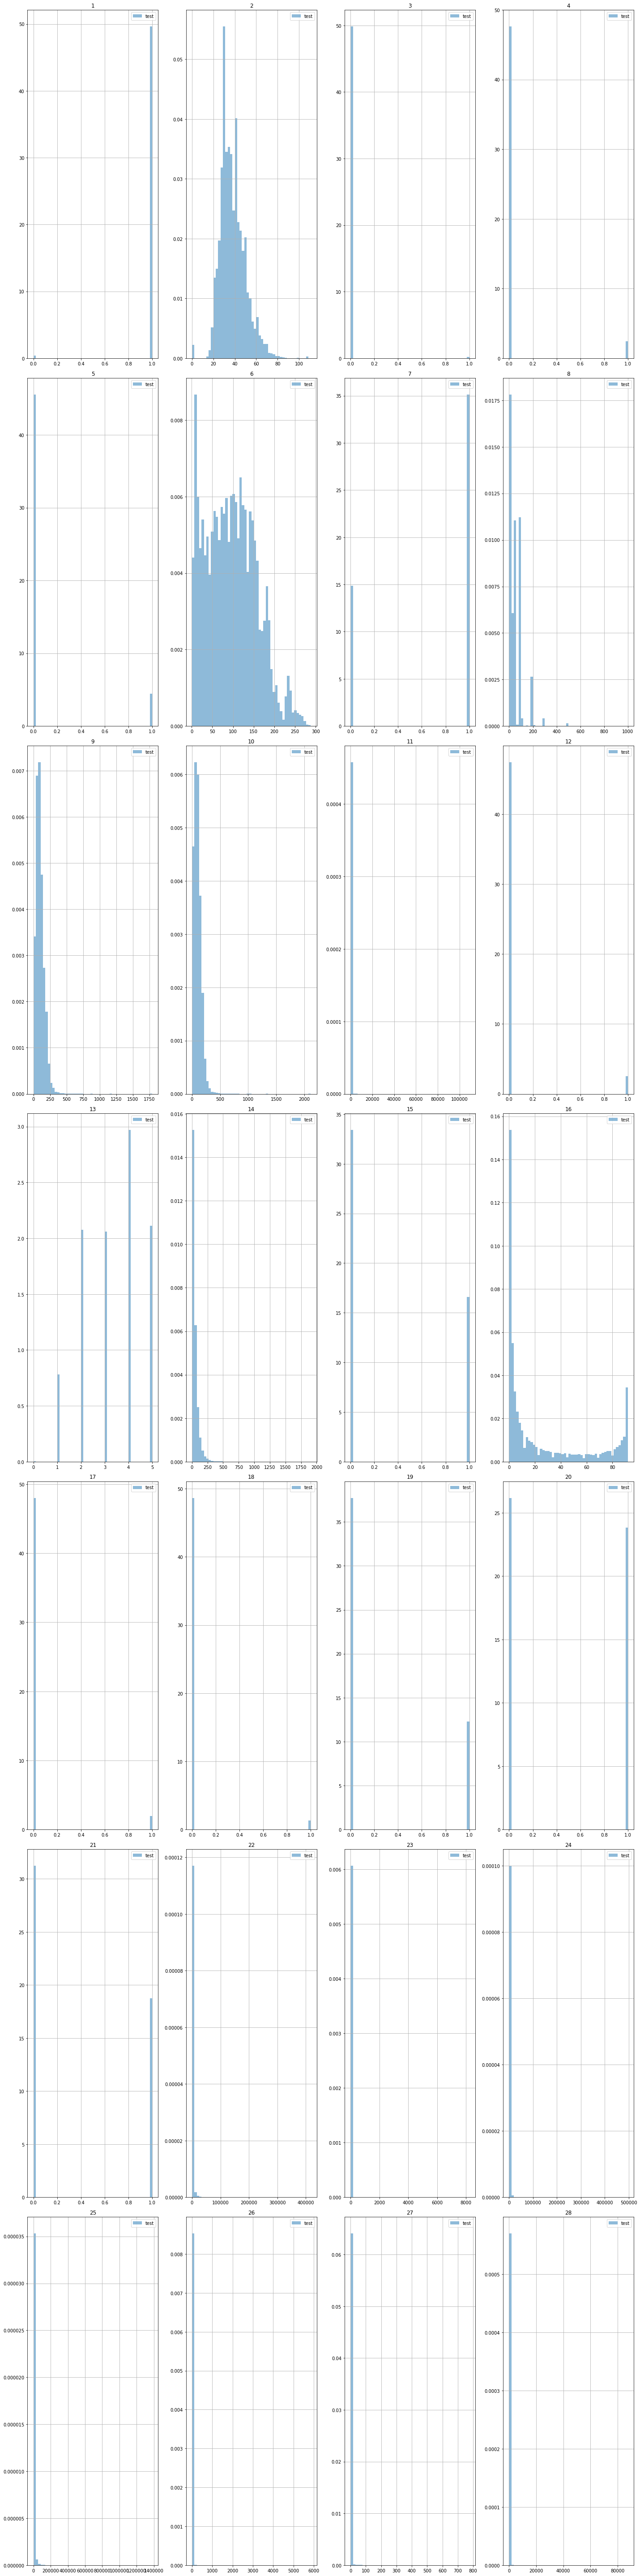

In [52]:
plt.figure(figsize=(20,80))
for i, c in enumerate(train_data.iloc[:, 1:29].columns):
    plt.subplot(7,4,i+1)
    max_, min_ = np.max([train_data[c].max(), test_data[c].max()]), np.min([train_data[c].min(), test_data[c].min()])
    bins = np.linspace(min_,max_,51)
    #train_data[c].hist(alpha=0.5,bins=bins, label="train", density=True)
    test_data[c].hist(alpha=0.5,bins=bins, label="test", density=True)
    plt.legend(loc="best")
    plt.title(f"{i+1}")
plt.tight_layout()
plt.show()